# Decision Tree (Gini Index)

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('seattle-weather.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
data.isnull().sum().sum()

0

In [4]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [5]:
data.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [6]:
data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [7]:
x = data[['precipitation','temp_max','temp_min','wind']]
y = data[['weather']]

In [8]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.20)

In [9]:
from sklearn.tree import DecisionTreeClassifier as dtc
model = dtc()
model = model.fit(x_train,y_train)

In [10]:
y_pred_train = model.predict(x_train)
y_pred_train

array(['rain', 'sun', 'snow', ..., 'rain', 'sun', 'rain'], dtype=object)

In [11]:
y_pred_test = model.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred_test)
cf

array([[  0,   4,   0,   0,  14],
       [  1,   3,   0,   0,  15],
       [  1,   3, 109,   5,   7],
       [  0,   0,   2,   6,   0],
       [  4,  17,   8,   0,  94]])

<AxesSubplot:>

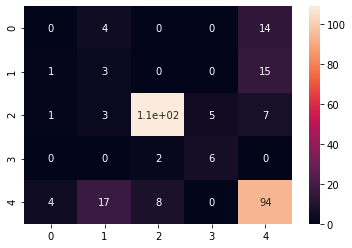

In [13]:
import seaborn as sn
sn.heatmap(cf,annot = True)

In [14]:
from sklearn.metrics import accuracy_score
print('Train data accuracy : ',accuracy_score(y_train,y_pred_train))

Train data accuracy :  0.9991438356164384


In [15]:
print('Test data accuracy : ',accuracy_score(y_test,y_pred_test))

Test data accuracy :  0.7235494880546075


# Decision Tree (Entropy)

In [16]:
model2 = dtc(criterion='entropy')
model2 = model2.fit(x_train,y_train)

In [17]:
y_pred_train = model2.predict(x_train)
y_pred_train

array(['rain', 'sun', 'snow', ..., 'rain', 'sun', 'rain'], dtype=object)

In [18]:
y_pred_test = model2.predict(x_test)

In [19]:
print("Training data accuracy : ",accuracy_score(y_train,y_pred_train))
print('Testing data accuracy : ',accuracy_score(y_test,y_pred_test))

Training data accuracy :  0.9991438356164384
Testing data accuracy :  0.7167235494880546


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier as rfc
model = rfc(n_estimators=100,criterion = 'entropy')
model.fit(x_train,y_train)

<ipython-input-20-481372fc40db>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy')

In [21]:
y_pred_train = model.predict(x_train)
y_pred_train

array(['rain', 'sun', 'snow', ..., 'rain', 'sun', 'rain'], dtype=object)

In [22]:
y_pred_test = model.predict(x_test)

In [23]:
cf = confusion_matrix(y_test,y_pred_test)
cf

array([[  1,   1,   0,   0,  16],
       [  0,   0,   0,   0,  19],
       [  1,   2, 112,   1,   9],
       [  0,   0,   2,   6,   0],
       [  1,   8,   0,   0, 114]])

<AxesSubplot:>

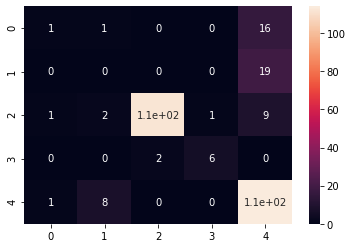

In [24]:
sn.heatmap(cf,annot = True)

In [25]:
print('training score : ',accuracy_score(y_train,y_pred_train))

training score :  0.9991438356164384


In [26]:
print('testing score : ', accuracy_score(y_test,y_pred_test))

testing score :  0.7952218430034129
